In [1]:
#1 Initialize Environment with Analysis Libraries"

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

**Steps#1** This initial step sets up the computational environment by importing essential Python libraries for data analysis and preprocessing. It includes os for interacting with the file system, pandas for data manipulation, and matplotlib.pyplot and seaborn for data visualization. Additionally, it brings in LabelEncoder and StandardScaler from sklearn.preprocessing to handle categorical encoding and feature scaling—critical steps for preparing data for machine learning models. These imports lay the foundation for all subsequent data operations and modeling tasks.

In [2]:
#2 Connect Colab to Google Drive Storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step#2** This step connects your Google Colab environment to your personal Google Drive, enabling seamless access to files stored in the cloud. By importing the drive module from google.colab and executing drive.mount('/content/drive'), your Drive is mounted to the Colab virtual file system at the path /content/drive. This allows you to read from and write to Drive as if it were a local directory, making it easy to load datasets, save outputs, and manage project artifacts directly within your notebook.

In [3]:
#3 Set File Paths for Data and Outputs

import os # Import os for path manipulation
project_root = '/content/drive/MyDrive/METABRIC_project'
data_path = '/content/drive/MyDrive/METABRIC_cleaned_imputed.csv' # Corrected path
output_path = os.path.join(project_root, 'outputs')

**Step#3** This step establishes the key file paths used throughout the project, ensuring consistent access to data and output locations. It imports the os module for path manipulation and sets project_root as the base directory within Google Drive. The path to the cleaned METABRIC dataset is defined as data_path, and an output_path is created by appending 'outputs' to the project root using os.path.join. These variables centralize file references, making the workflow more maintainable and portable across environments.

In [4]:
#4 Load and Preview METABRIC Dataset

import pandas as pd

# Ensure data_path is defined if this cell is run independently
data_path = '/content/drive/MyDrive/METABRIC_cleaned_imputed.csv'

# Load dataset
df = pd.read_csv(data_path)

# Display column names
print("Column names in the dataset:")
print(df.columns)

Column names in the dataset:
Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')


**Step#4** This step loads the METABRIC dataset from a CSV file into a pandas DataFrame and performs an initial inspection of its structure. It ensures the data_path variable is defined and uses pd.read_csv to read the file. The script then prints the column names to provide an overview of the available features, which include clinical, genomic, and survival-related variables. Finally, df.head() is used to display the first few rows, allowing a quick visual check of the data's format and content before proceeding with preprocessing or analysis.

In [5]:
#5 Preview Patient-Level Data Records

display(df.head())

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,76,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,139,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,84,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,49,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151,Recurred,Female,ER+/HER2- Low Prolif,15.0,2.0,Died of Disease
3,MB-0006,48,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,163,Not Recurred,Female,ER+/HER2- Low Prolif,25.0,2.0,Living
4,MB-0008,77,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,19,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


**Step#5** This step visually inspects the first few rows of the METABRIC dataset using df.head(), providing a snapshot of the data structure and content. It reveals individual patient records with attributes such as age at diagnosis, type of breast surgery, cancer subtype, treatment history, and survival outcomes. This preview helps verify that the dataset has loaded correctly and offers an intuitive understanding of the clinical and genomic variables available for analysis. It's a crucial checkpoint before proceeding with data cleaning or modeling.

In [6]:
#6 Reload METABRIC Dataset for Cell Independence)
data_path = '/content/drive/MyDrive/METABRIC_cleaned_imputed.csv'
df = pd.read_csv(data_path)

**Step#6** This step reloads the METABRIC dataset from its CSV source to ensure the DataFrame df is available, especially when running the cell independently or out of sequence. It redefines the data_path variable pointing to the cleaned and imputed dataset stored in Google Drive, and uses pd.read_csv to load the data into memory. This redundancy ensures robustness in the workflow, allowing modular execution without relying on previous cells being run.

In [7]:
#7 Ensure Output Directory Exists
os.makedirs(output_path, exist_ok=True)

**Step#7** This step ensures that the designated output directory exists before saving any results or visualizations. Using os.makedirs(output_path, exist_ok=True), it creates the folder specified by output_path if it doesn't already exist, preventing errors during file write operations. The exist_ok=True flag allows the code to run safely even if the directory is already present, making the workflow more robust and repeatable across sessions.

In [8]:
#8 Convert Categorical Text to Numeric Codes

categorical_cols = df.select_dtypes(include='object').columns
encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col, encoder in encoders.items():
    df[col] = encoder.transform(df[col])

**Step#8** This step transforms categorical text features into numerical format using LabelEncoder from scikit-learn, a necessary preprocessing step for many machine learning models. It first identifies all object-type columns in the DataFrame, then fits a separate encoder for each column and applies the transformation in-place. This ensures that each unique category is mapped to a distinct integer, enabling algorithms to process these features effectively. The use of a dictionary to store encoders also allows for consistent decoding or reuse later in the pipeline.

In [9]:
#9 Standardize Numeric Features for Modeling

numeric_cols = df.select_dtypes(include='number').columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

**Step#9** This step standardizes all numeric columns in the dataset using StandardScaler from scikit-learn, a common preprocessing technique that centers features around zero with unit variance. It first identifies numeric columns via df.select_dtypes(include='number'), then fits the scaler and transforms the data in-place. This normalization ensures that features like tumor size, age, and mutation count are on comparable scales, which improves model performance and stability, especially for algorithms sensitive to feature magnitude such as CoxPH or logistic regression.

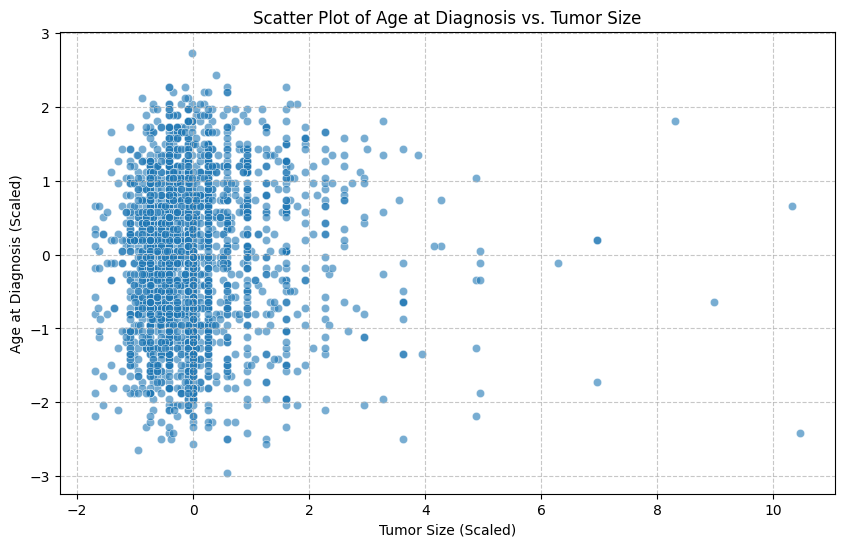

In [10]:
#10 Scatter Plot of Tumor Size vs. Age

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tumor Size', y='Age at Diagnosis', data=df, alpha=0.6)
plt.title('Scatter Plot of Age at Diagnosis vs. Tumor Size')
plt.xlabel('Tumor Size (Scaled)')
plt.ylabel('Age at Diagnosis (Scaled)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Step#10** This step creates a scatter plot to explore the relationship between tumor size and age at diagnosis using the seaborn and matplotlib libraries. It sets up a figure with custom dimensions and plots each patient as a point, with tumor size on the x-axis and age at diagnosis on the y-axis. Both axes are labeled as "Scaled," suggesting prior normalization or standardization. The plot includes a title, gridlines for readability, and a transparency setting (alpha=0.6) to reduce overplotting. This visualization helps identify patterns or clusters in the data, such as whether larger tumors tend to occur at specific age ranges.

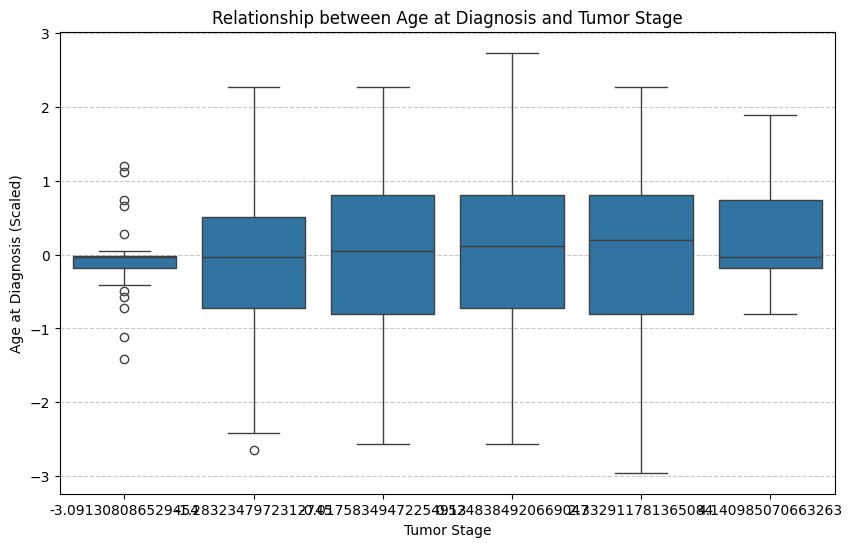

In [11]:
#11 Boxplot of Age by Tumor Stage

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tumor Stage', y='Age at Diagnosis', data=df)
plt.title('Relationship between Age at Diagnosis and Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Age at Diagnosis (Scaled)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Step#11** This step uses a boxplot to examine how age at diagnosis varies across different tumor stages. Leveraging seaborn and matplotlib, the plot displays the distribution of scaled age values for each stage, with boxes representing the interquartile range and whiskers showing the spread of the data. Outliers are marked as individual points, and a grid is added for clarity. This visualization helps identify whether certain tumor stages are associated with younger or older patients, offering insights into disease progression patterns and potential age-related clinical implications.

In [12]:
#12 Export Final Preprocessed Dataset

df.to_csv(os.path.join(output_path, 'METABRIC_preprocessed.csv'), index=False)

**Step#12** This step finalizes the preprocessing workflow by saving the transformed DataFrame to disk. Using df.to_csv, the data is written to a file named METABRIC_preprocessed.csv within the designated output directory. The index=False argument ensures that row indices are excluded from the saved file, keeping the output clean and focused on the actual data. This export preserves all encoding and scaling operations, making the dataset ready for downstream modeling, sharing, or reproducibility in future sessions.